In [18]:
from pathlib import Path
from typing import Tuple

import numpy as np
import numpy.typing as npt
import skimage.transform
import skimage.util
from tifffile import tifffile

from pybasic.basic import basic

In [19]:
working_size = 128


def resize(a: npt.NDArray, shape: Tuple[int, ...]) -> npt.NDArray:
    return skimage.transform.resize(a, shape, order=1, mode='symmetric')


# read in images
examples_path = Path(r'images')
images = examples_path / 'Cell_culture' / 'Uncorrected' / 'DAPI'
images = [tifffile.imread(p) for p in images.iterdir()]
orig_size = images[0].shape
images = [resize(im, (working_size, working_size)) for im in images]
images = np.stack(images)
images = skimage.util.img_as_float(images)

# compute
flatfield, darkfield = basic(images, compute_darkfield=True)
# flatfield = resize(flatfield, orig_size)
# darkfield = resize(darkfield, orig_size)

Converged in 38 iterations
Re-weighting iter 1: 2,101.7ms
Converged in 38 iterations
Re-weighting iter 2: 2,100.4ms
Converged in 1 iterations


/tmp/ipykernel_645861/1213186714.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


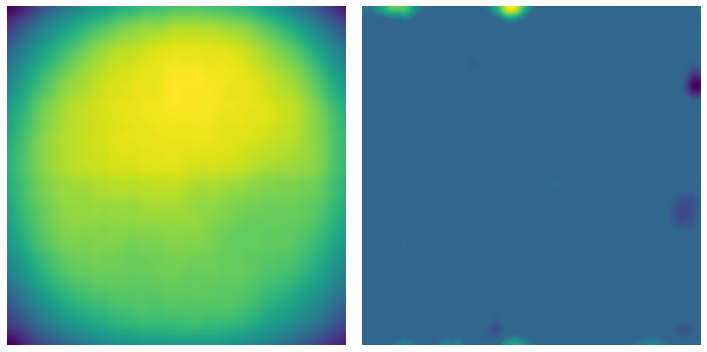

In [20]:
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
from matplotlib.figure import Figure

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig: Figure
axes: npt.NDArray[Axes]

axes[0].imshow(flatfield)
axes[1].imshow(darkfield)

axes[0].axis('off')
axes[1].axis('off')

fig.tight_layout()
fig.show()